In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Basic grath

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]


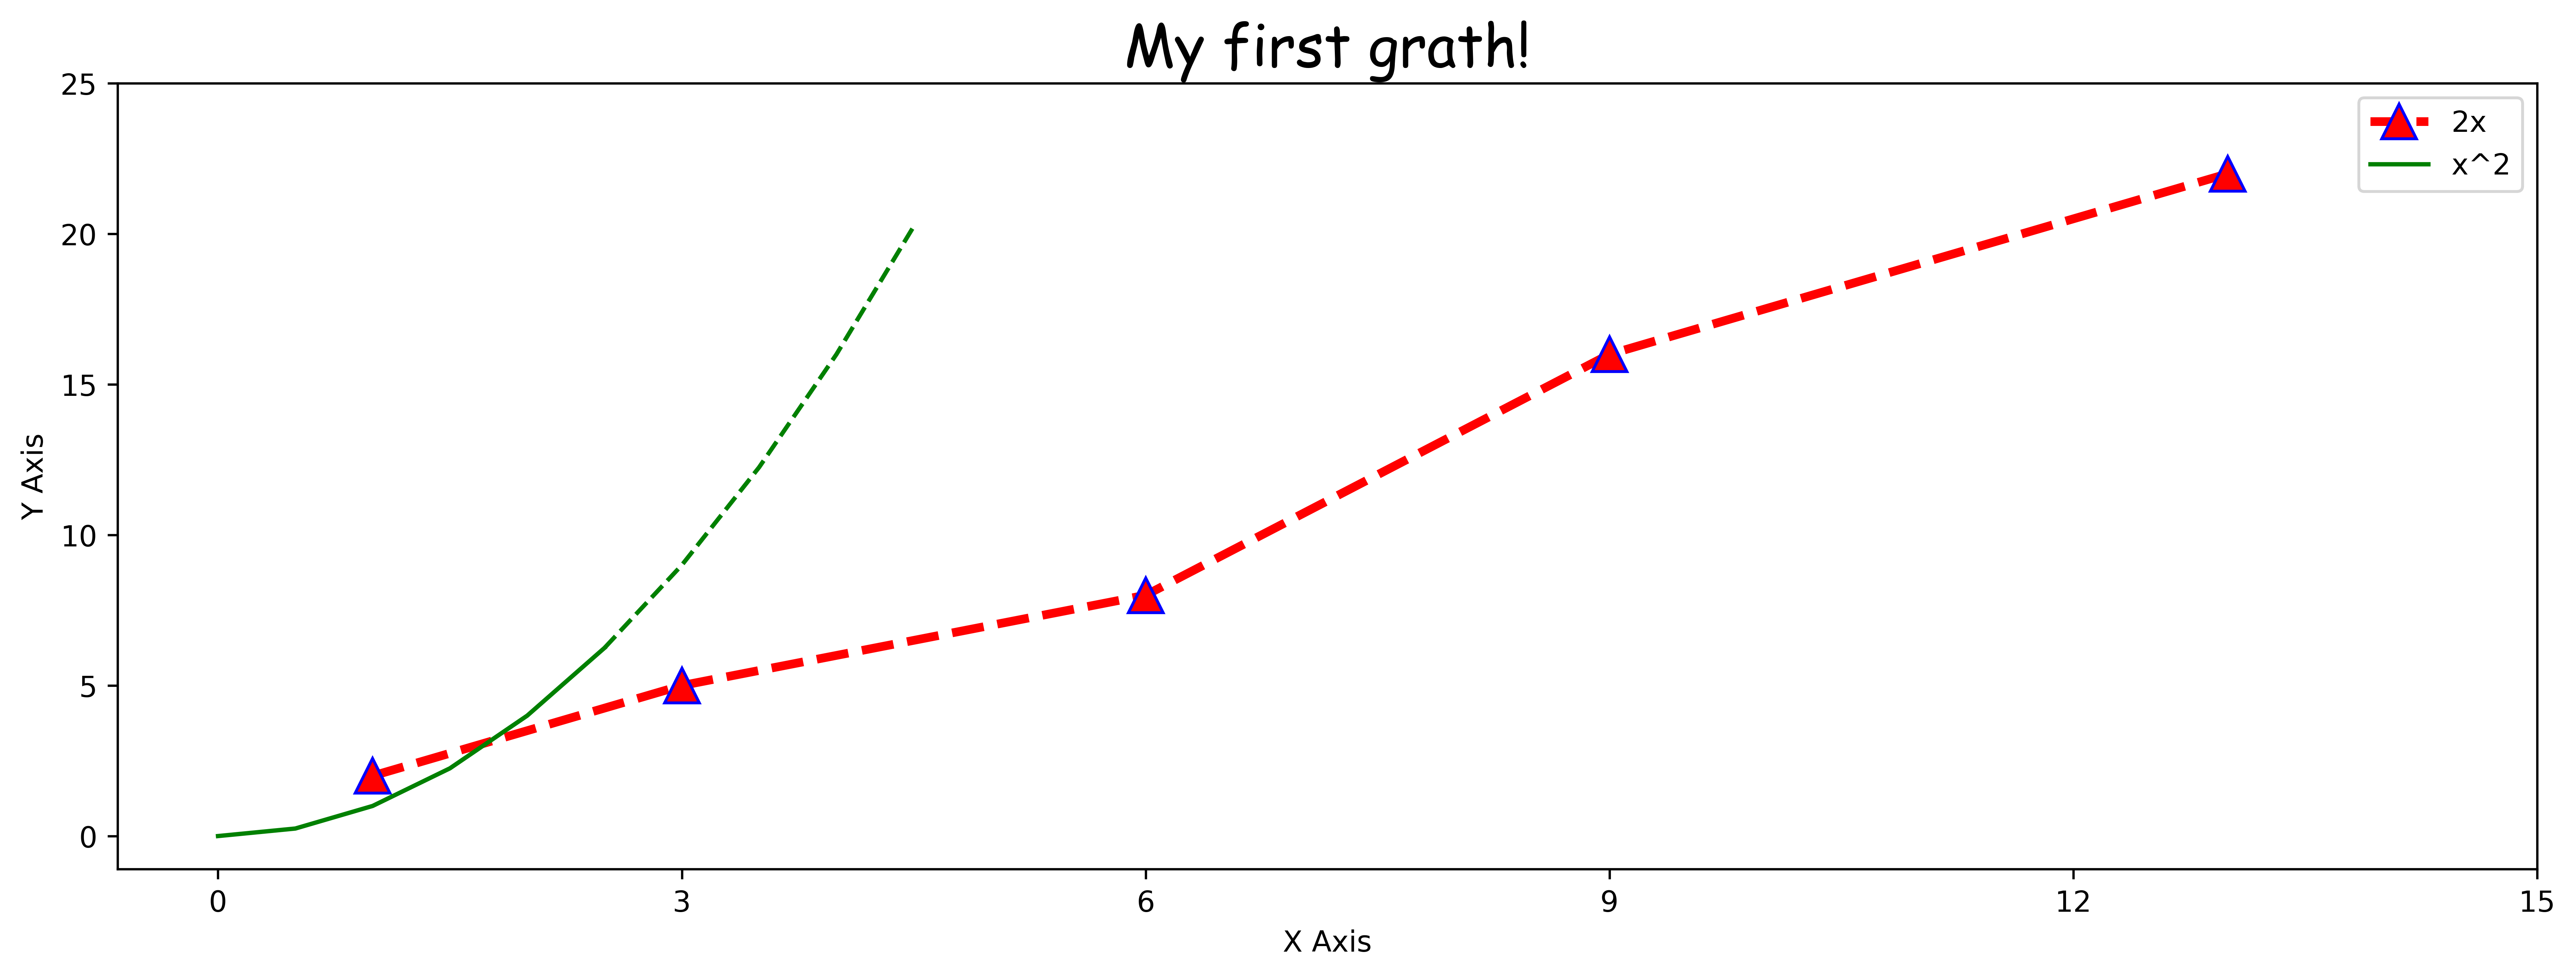

In [2]:
# Resize your grath
plt.figure(figsize=(15,5), dpi=600)

# line one
x = [1, 3, 6, 9, 13]
y = [2, 5, 8, 16, 22]
# Keyword argument notation
plt.plot(x, y, label='2x', color='red', linewidth=3, linestyle='--', marker='^', markersize=12, markeredgecolor='blue')

# line two
# Select interval we want to plot points at
x2 = np.arange(0, 5, 0.5)
print(x2)
# Shorthand notation
# fmt = '[color][marker][line]'
# Plot part of the grath as line
plt.plot(x2[:6], x2[:6]**2, 'g', label='x^2')
# Plot remainder of grath as a dot
plt.plot(x2[5:], x2[5:]**2, 'g--')

# Add a title (specify font parameters with fontdict)
plt.title('My first grath!', fontdict = {'fontname' : 'Comic Sans MS', 'fontsize' : 20})

# X and Y labels
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# X, Y axis tickmarks (scale of your grath)
plt.xticks([0, 3, 6, 9, 12, 15])
plt.yticks([0, 5, 10, 15, 20, 25])

plt.legend()
plt.savefig('mygrath.png', dpi=600)
plt.show()

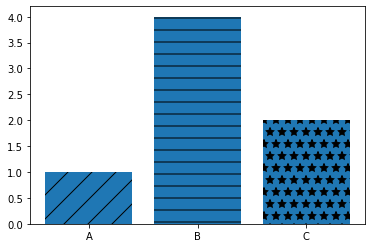

<Figure size 1500x500 with 0 Axes>

In [3]:
labels = ['A', 'B', 'C']
values = [1, 4, 2]

bars = plt.bar(labels, values)
bars[0].set_hatch('/')
bars[1].set_hatch('-')
bars[2].set_hatch('*')

plt.figure(figsize=(15, 5), dpi=100)

plt.show()

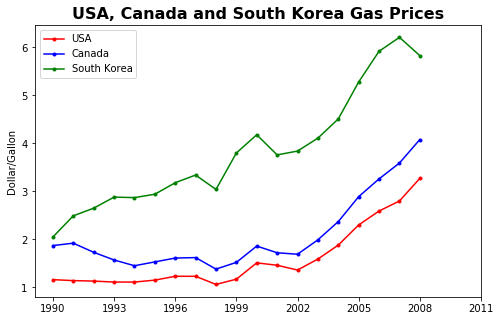

In [4]:
gas = pd.read_csv('gas_prices.csv')

plt. figure(figsize=(8,5))

plt.plot(gas.Year, gas.USA, 'r.-', label='USA')
plt.plot(gas.Year, gas.Canada, 'b.-', label='Canada')
# в случае, если название столбца состоит из нескольких слов, необходимо использовать квадратные скобки
plt.plot(gas.Year, gas['South Korea'], 'g.-', label='South Korea')

plt.title('USA, Canada and South Korea Gas Prices', fontdict={'fontweight':'bold', 'fontsize': 16})
plt.ylabel('Dollar/Gallon')
plt.legend()

plt.xticks(gas.Year[::3].tolist()+[2011])

# сохраняем наш график в файл
plt.savefig('Gas_price_figure.png', dpi=300)

plt.show()

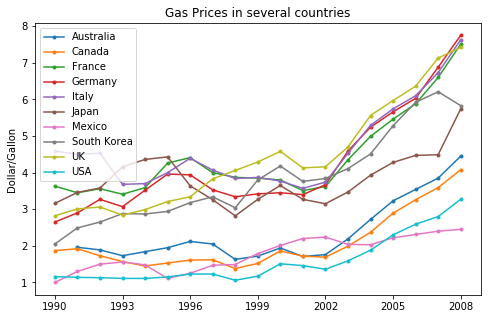

In [5]:
gas = pd.read_csv('gas_prices.csv')

plt. figure(figsize=(8,5))

for country in gas:
    if country != 'Year':
        plt.plot(gas.Year, gas[country], marker='.', label=country)

plt.title('Gas Prices in several countries')
plt.ylabel('Dollar/Gallon')
plt.legend()

plt.xticks(gas.Year[::3])

plt.show()

### Working with fifa data

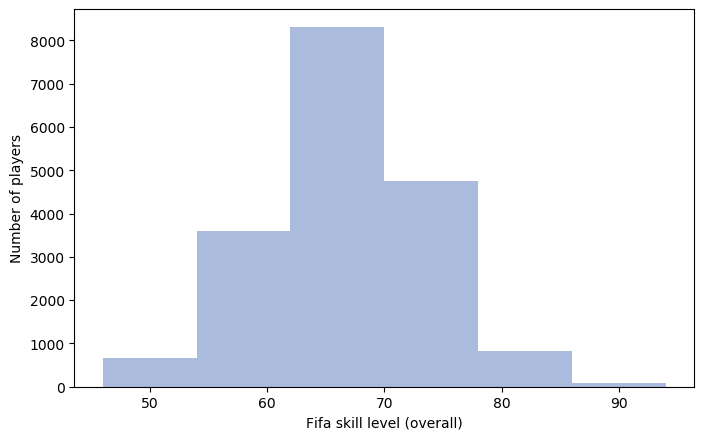

In [6]:
fifa = pd.read_csv('fifa_data.csv')

plt.figure(figsize=(8, 5), dpi=100)

# чтобы выбрать цвет можно воспользоваться google color picker
a = plt.hist(fifa.Overall, bins=6, color='#aabbdd')

plt.ylabel('Number of players')
plt.xlabel('Fifa skill level (overall)')

plt.show()

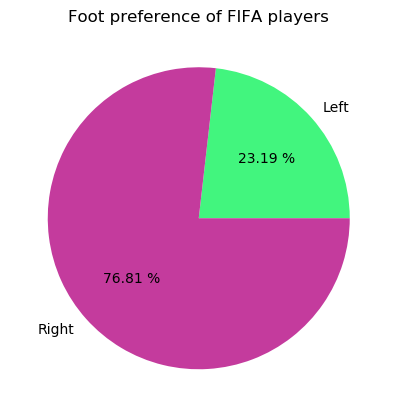

In [7]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

plt.figure(figsize=(8, 5), dpi=100)

labels = ['Left', 'Right']
colors = ['#42f57e', '#c43b9d']

plt.pie([left, right], labels = labels, colors = colors, autopct = '%.2f %%')
plt.title('Foot preference of FIFA players')

plt.show()

### Поделим футболистов на весовые группы

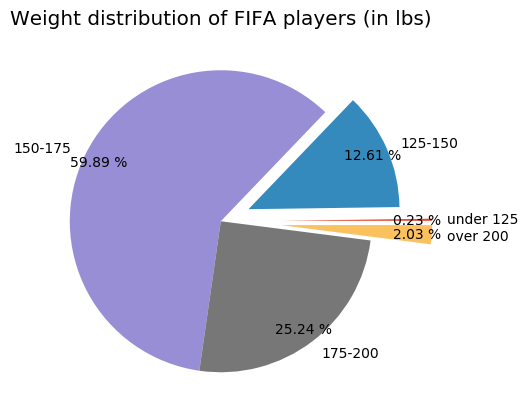

In [9]:
# обрезаем фунты(lbs) от числа по всем футболистам
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

# формируем группы по весу
light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa.loc[fifa.Weight >= 200].count()[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['under 125', '125-150', '150-175', '175-200', 'over 200']
explode = (.4, .2, 0, 0, .4)

plt.figure(figsize=(8, 5), dpi=100)
plt.title('Weight distribution of FIFA players (in lbs)')

# используем более нейтральную гамму для нашего пирога
plt.style.use('ggplot')

plt.pie(weights, labels=labels, autopct = '%.2f %%', pctdistance=0.9, explode=explode)

plt.show()

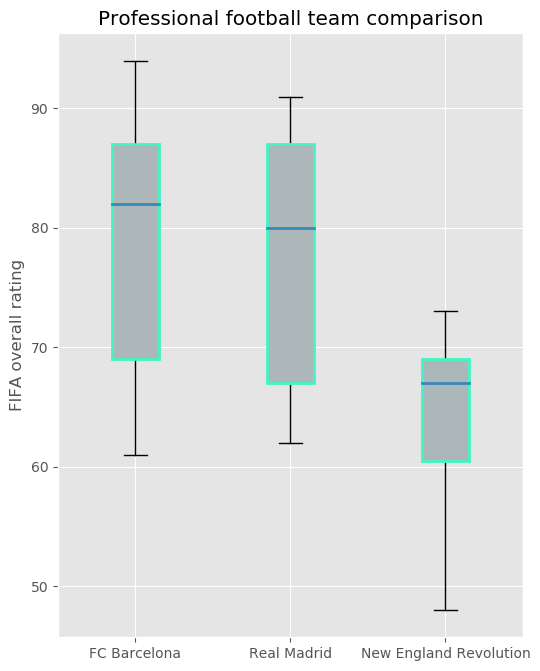

In [26]:
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']

labels = ['FC Barcelona', 'Real Madrid', 'New England Revolution']


plt.figure(figsize=(6, 8), dpi=100)

# patch_artist=True позволяет использовать цвета и избежать ошибки:'Line2D' object has no attribute 'set_facecolor'
boxes = plt.boxplot([barcelona, madrid, revs], labels=labels, patch_artist=True, medianprops={'linewidth':2})

for box in boxes['boxes']:
    # set edge color
    box.set(color='#42f5c2', linewidth=2)

    # change fill color
    box.set(facecolor='#adb7ba')


plt.title('Professional football team comparison')
plt.ylabel('FIFA overall rating')

plt.show()

In [18]:
belarus = fifa.loc[fifa.Nationality == 'Belarus']['Name']
belarus

1672    Renan Bressan
5236       A. Putsila
6177       S. Chernik
7731        A. Saroka
Name: Name, dtype: object